In [1]:
from sklearn.manifold import TSNE

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Antigo Dataset

In [3]:
frzd_olist_document_embeddings = pd.read_parquet(
    path='../dataset/featured/frzd_olist_document_embeddings.parquet.snappy',
    engine='pyarrow'
)

In [111]:
sample_size = frzd_olist_document_embeddings.shape[0]
sample = frzd_olist_document_embeddings.sample(sample_size)

In [112]:
embeddings = sample.loc[:, [f'{index}' for index in range(400)]].values
labels = sample.loc[:, 'review_score'].values

In [113]:
tsne = TSNE(
    n_components=2,
    learning_rate='auto',
    init='random',
    metric='euclidean',
    perplexity=20,
    n_jobs=-1
)

In [114]:
bidimensional_embeddings = tsne.fit_transform(embeddings)

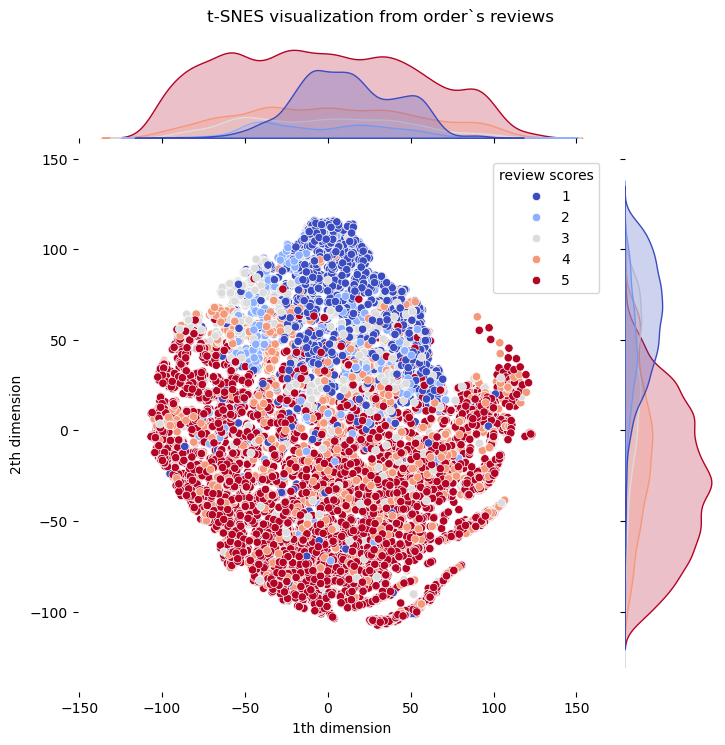

In [116]:
sns.jointplot(
   x=bidimensional_embeddings[:, 0],
   y=bidimensional_embeddings[:, 1],
   hue=labels,
   palette='coolwarm',
   kind='scatter',
   height=7,
)

plt.legend(title='review scores')
plt.xlabel('1th dimension')
plt.ylabel('2th dimension')
plt.suptitle('t-SNES visualization from order`s reviews', y=1.03)

sns.despine(left=True, bottom=True)

plt.savefig('../visualizations/tsnes.png')

Novo Dataset

In [2]:
frzd_olist_document_embeddings_train = pd.read_parquet(
    path='../dataset/featured/frzd_olist_document_embeddings_train.parquet.snappy',
    engine='pyarrow'
)

In [3]:
embeddings = frzd_olist_document_embeddings_train.loc[:, [f'{index}' for index in range(400)]].values
labels = frzd_olist_document_embeddings_train.loc[:, 'review_sentiment'].values

In [25]:
tsne = TSNE(
    n_components=2,
    learning_rate='auto',
    init='random',
    metric='euclidean',
    perplexity=20,
    n_jobs=-1
)

In [26]:
bidimensional_embeddings = tsne.fit_transform(embeddings)

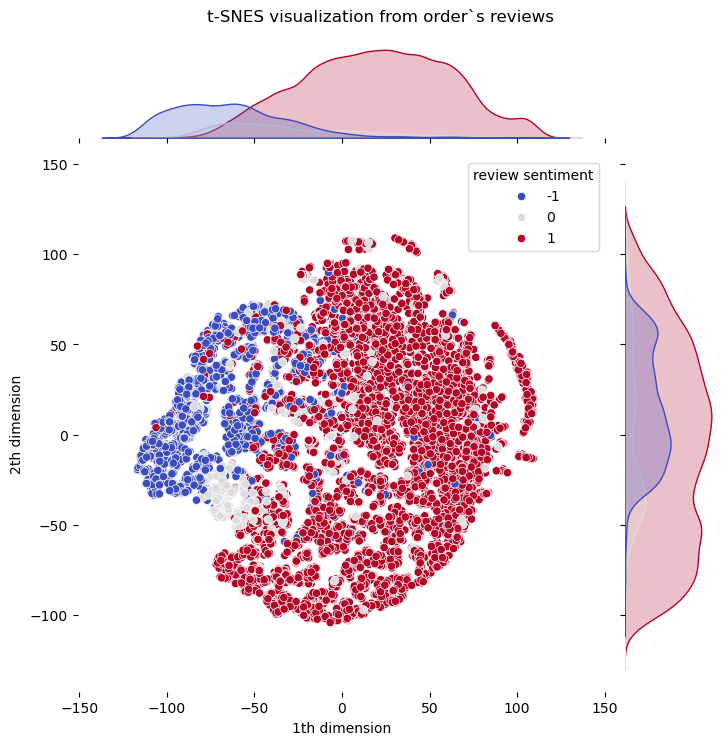

In [27]:
sns.jointplot(
   x=bidimensional_embeddings[:, 0],
   y=bidimensional_embeddings[:, 1],
   hue=labels,
   palette='coolwarm',
   kind='scatter',
   height=7,
)

plt.legend(title='review sentiment')
plt.xlabel('1th dimension')
plt.ylabel('2th dimension')
plt.suptitle('t-SNES visualization from order`s reviews', y=1.03)

sns.despine(left=True, bottom=True)

plt.savefig('../visualizations/tsnes_polarity.png')